In [1]:
import pandas as pd
import numpy as np

In [2]:
import statsmodels.api as sm
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_excel(r"C:\Users\Asus\Desktop\DDP\Clean2d_master_dataset.xlsx")

In [5]:
data.head()

,Time (s),Material,Alpha,Part,Node,X,Y,Z,Temperature,T_left,T_right,T_bottom,T_top,x/L,y/L,z/L,Tdiff_0.0005 (s)
0,0.01,Copper,0.000111,PART-1-1,1,0.000,0.0,0,300.0,300,100,300,100,0.0,0.0,0,1.25
1,0.01,Copper,0.000111,PART-1-1,9,0.004,0.0,0,300.0,300,100,300,100,0.2,0.0,0,1.25
2,0.01,Copper,0.000111,PART-1-1,17,0.008,0.0,0,300.0,300,100,300,100,0.4,0.0,0,1.25
3,0.01,Copper,0.000111,PART-1-1,25,0.012,0.0,0,300.0,300,100,300,100,0.6,0.0,0,1.25
4,0.01,Copper,0.000111,PART-1-1,33,0.016,0.0,0,300.0,300,100,300,100,0.8,0.0,0,1.25


In [6]:
data.describe()

,Time (s),Alpha,Node,X,Y,Z,Temperature,T_left,T_right,T_bottom,T_top,x/L,y/L,z/L,Tdiff_0.0005 (s)
count,38016.000000,38016.000000,38016.000000,38016.000000,38016.000000,38016.0,3.801600e+04,38016.000000,38016.000000,38016.000000,38016.000000,38016.00000,38016.00000,38016.0,19008.000000
mean,1.289773,0.000050,431.000000,0.010000,0.005000,0.0,1.780572e+02,450.000000,100.000000,350.000000,50.000000,0.50000,0.50000,0.0,1.585000
std,3.347419,0.000041,280.420045,0.006831,0.003416,0.0,1.546827e+02,111.804869,81.650732,50.000658,50.000658,0.34157,0.34157,0.0,0.335009
min,0.010000,0.000004,1.000000,0.000000,0.000000,0.0,-2.887560e-33,300.000000,0.000000,300.000000,0.000000,0.00000,0.00000,0.0,1.250000
25%,0.050000,0.000018,187.000000,0.004000,0.002000,0.0,4.525520e+01,375.000000,0.000000,300.000000,0.000000,0.20000,0.20000,0.0,1.250000
50%,0.150000,0.000044,431.000000,0.010000,0.005000,0.0,1.227250e+02,450.000000,100.000000,350.000000,50.000000,0.50000,0.50000,0.0,1.585000
75%,1.000000,0.000076,675.000000,0.016000,0.008000,0.0,3.000000e+02,525.000000,200.000000,400.000000,100.000000,0.80000,0.80000,0.0,1.920000
max,20.000000,0.000111,861.000000,0.020000,0.010000,0.0,6.000000e+02,600.000000,200.000000,400.000000,100.000000,1.00000,1.00000,0.0,1.920000


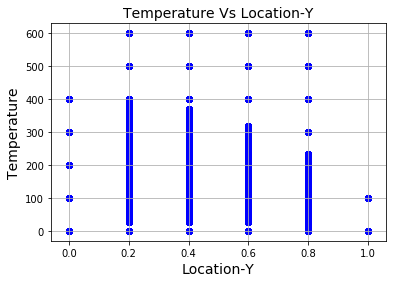

In [7]:
plt.scatter(data['y/L'], data['Temperature'], color='blue')
plt.title('Temperature Vs Location-Y', fontsize=14)
plt.xlabel('Location-Y', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.grid(True)
plt.show()

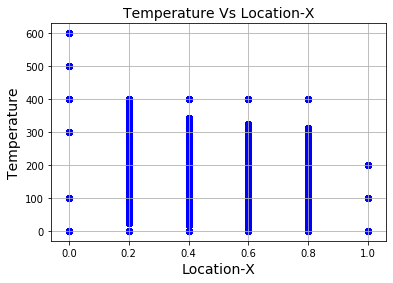

In [8]:
plt.scatter(data['x/L'], data['Temperature'], color='blue')
plt.title('Temperature Vs Location-X', fontsize=14)
plt.xlabel('Location-X', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.grid(True)
plt.show()

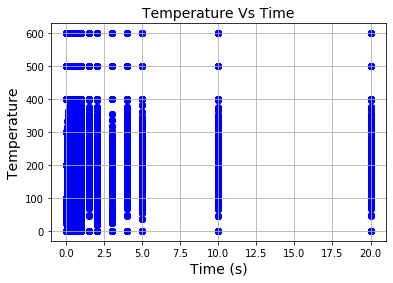

In [9]:
plt.scatter(data['Time (s)'], data['Temperature'], color='blue')
plt.title('Temperature Vs Time', fontsize=14)
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.grid(True)
plt.show()

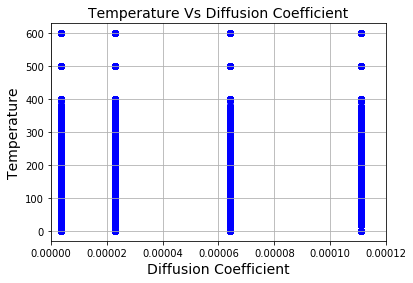

In [10]:
plt.scatter(data['Alpha'], data['Temperature'], color='blue')
plt.title('Temperature Vs Diffusion Coefficient', fontsize=14)
plt.xlabel('Diffusion Coefficient', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.grid(True)
plt.xlim([0, 1.2E-4])
plt.show()

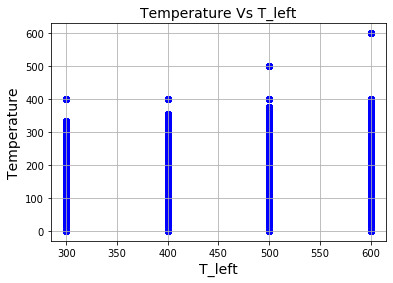

In [11]:
plt.scatter(data['T_left'], data['Temperature'], color='blue')
plt.title('Temperature Vs T_left', fontsize=14)
plt.xlabel('T_left', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.grid(True)
plt.show()

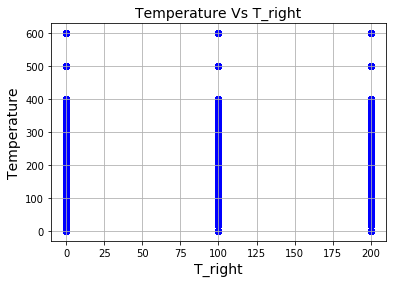

In [12]:
plt.scatter(data['T_right'], data['Temperature'], color='blue')
plt.title('Temperature Vs T_right', fontsize=14)
plt.xlabel('T_right', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.grid(True)
plt.show()

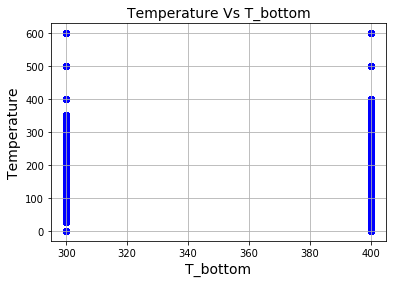

In [13]:
plt.scatter(data['T_bottom'], data['Temperature'], color='blue')
plt.title('Temperature Vs T_bottom', fontsize=14)
plt.xlabel('T_bottom', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.grid(True)
plt.show()

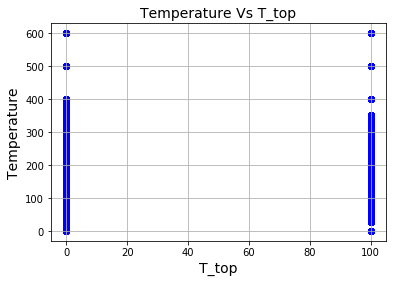

In [14]:
plt.scatter(data['T_top'], data['Temperature'], color='blue')
plt.title('Temperature Vs T_top', fontsize=14)
plt.xlabel('T_top', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.grid(True)
plt.show()

In [15]:
#seperating independent and dependent variables, Temperature is the only dependent variable in our case
x = data[['T_left', 'T_right', 'T_bottom', 'T_top','Time (s)', 'Alpha', 'x/L']]
y = data['Temperature']
x.shape, y.shape

((38016, 7), (38016,))

In [41]:
import time
#storing starting time
begin = time.time()

#Creating Training-Testing data from the new data frame

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y , test_size = 0.25, random_state = 100)

In [42]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=5000, max_depth= 10, random_state=100, oob_score = True)

In [43]:
rf.fit(train_x, train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=5000, n_jobs=None, oob_score=True,
                      random_state=100, verbose=0, warm_start=False)

In [44]:
y_pred = rf.predict(test_x)
print (y_pred)

[ 1.00000000e+02 -5.48501390e-35  3.09327031e+01 ...  1.17329369e+02
  8.52265671e-34  9.80094287e+01]


In [45]:
from sklearn.metrics import r2_score
r2_score(test_y, y_pred)

0.9850340784376129

In [46]:
#storing end time
time.sleep(1)
end = time.time()

In [47]:
#Calculating runtime
print ("Total runtime of Random Forest program (in seconds) is", end - begin)

Total runtime of Random Forest program (in seconds) is 414.57665848731995


In [48]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

Mean Absolute Error: 9.438187690685787
Mean Squared Error: 343.8139490300532
Root Mean Squared Error: 18.542220714629984


In [49]:
importances = pd.DataFrame({'feature':train_x.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')


In [50]:
importances.head()

,importance
feature,
y/L,0.413
x/L,0.403
Time (s),0.057
T_left,0.049
T_right,0.032


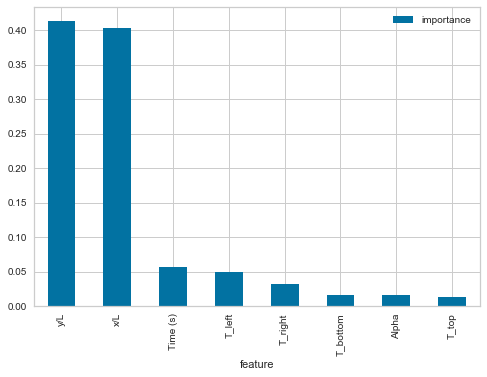

In [51]:
importances.plot.bar()

In [52]:
rf.oob_score_

0.9868182118842413

In [53]:
df=pd.DataFrame({'Actual':test_y, 'Predicted':y_pred})
df

,Actual,Predicted
5771,1.000000e+02,1.000000e+02
27401,-8.259910e-35,-5.485014e-35
22628,2.732510e+01,3.093270e+01
12451,1.000000e+02,1.000000e+02
13111,8.743740e+01,1.073104e+02
...,...,...
35221,2.681660e+02,2.758651e+02
13384,9.986740e+01,1.085089e+02
9154,1.324940e+02,1.173294e+02
16235,-8.480660e-42,8.522657e-34


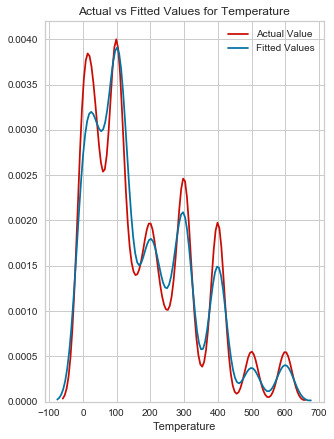

In [54]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Temperature')


plt.show()
plt.close()

In [30]:
#x_test = np.array([0.8,0.33,8e-6,400,150])
#x_test = x_test.reshape((1,-1))
#y_pred = rf.predict(x_test)

In [31]:
print ("The predicted temperature for the given parameters is", y_pred[0])

The predicted temperature for the given parameters is 83.0266247299811


In [55]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [56]:
#from yellowbrick.datasets import load_energy
from yellowbrick.model_selection import validation_curve

In [57]:

x = data[['T_left', 'T_right', 'T_bottom', 'T_top', 'Time (s)', 'Alpha', 'x/L', 'y/L']]
y = data['Temperature']

In [58]:
parameter_range = np.arange(1, 15, 1)

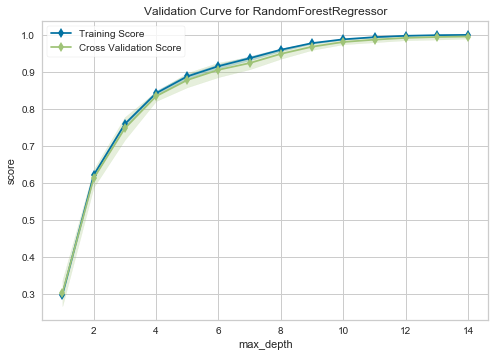

In [59]:
viz = validation_curve(RandomForestRegressor(), x, y, param_name = "max_depth", param_range = parameter_range, cv = 10, scoring = "r2")

In [ ]:
viz.fit(x,y)
viz.show()

In [ ]:
parameter_range = np.arange(1, 10000, 500)
viz = validation_curve(RandomForestRegressor(), x, y, param_name = "n_estimators", param_range = parameter_range, cv = 5, scoring = "r2")

In [ ]:
from yellowbrick.model_selection import learning_curve

x = data[['T_left', 'T_right', 'T_bottom', 'T_top', 'Time (s)', 'Alpha', 'x/L', 'y/L']]
y = data['Temperature']

In [ ]:
print(learning_curve(RandomForestRegressor(), x, y, cv=10, scoring='r2'))

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

from yellowbrick.regressor import PredictionError

# Load a regression dataset
x = data[['T_left', 'T_right', 'T_bottom', 'T_top', 'Time (s)', 'Alpha', 'x/L', 'y/L']]
y = data['Temperature']

# Instantiate the linear model and visualizer
model = Lasso()
visualizer = PredictionError(model)

visualizer.fit(train_x, train_y)  # Fit the training data to the visualizer
visualizer.score(test_x, test_y)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure